In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [472]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

<h3>Data</h3>

In [473]:
gc_data.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


<h3>Instantiate</h3>

In [474]:
linreg = LinearRegression()
X = gc_data['Chirps/Second'].reshape(-1,1)
y = gc_data['Ground Temperature'].reshape(-1,1)

In [475]:
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h3>Predict Ground Temperatures from Chirps/Second</h3>

In [476]:
linreg.predict(18)

array([[ 84.2347963]])

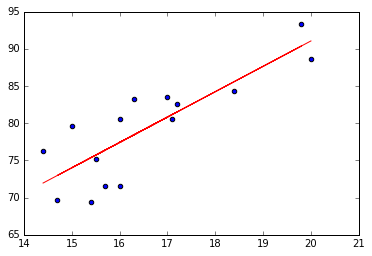

In [477]:
plt.scatter(gc_data['Chirps/Second'].reshape(-1,1), gc_data['Ground Temperature'].reshape(-1,1))
plt.plot(gc_data[['Chirps/Second']],linreg.predict((gc_data[['Chirps/Second']])),color='red')


<h3>R-Squared, Intercept, and Coefficient</h3>

In [478]:
print('R-squared', linreg.score(X,y))
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)

R-squared 0.692294652915
Intercept: [ 22.84898231]
Coefficient: [[ 3.410323]]


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [479]:
brain_body_data = pd.read_fwf("brain_body.txt")
brain_body_data.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


<H3>Instantiate and Plot</h3>

In [480]:
bb_data = LinearRegression()
x=brain_body_data['Brain'].reshape(-1,1)
y=brain_body_data['Body'].reshape(-1,1)
bb_data.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

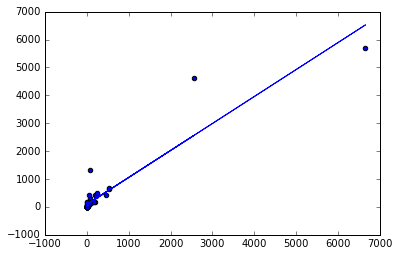

In [481]:
plt.scatter(brain_body_data['Brain'].reshape(-1,1), brain_body_data['Body'].reshape(-1,1))
plt.plot(brain_body_data[['Brain']],bb_data.predict((brain_body_data[['Brain']])))

<h3>Intercept, Coefficient, and R-squared</h3>

In [482]:
print('Intercept:', bb_data.intercept_)
print('Coefficient:', bb_data.coef_)
print('R-squared', bb_data.score(x,y))

Intercept: [ 91.00439621]
Coefficient: [[ 0.96649637]]
R-squared 0.872662084304


<h3>Predict body size with brain size</h3>

In [483]:
bb_data.predict(7)

array([[ 97.76987078]])

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [484]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
sex_list = [0, 5]
sex = pd.read_fwf('salary.txt', names=['Sex', 'Salary'], usecols=sex_list)

rank_list = [1, 5]
rank = pd.read_fwf('salary.txt', names=['Rank', 'Salary'], usecols=rank_list)

year_list = [2, 5]
year = pd.read_fwf('salary.txt', names=['Year', 'Salary'], usecols=year_list)

degree_list = [3, 5]
degree = pd.read_fwf('salary.txt', names=['Degree', 'Salary'], usecols=degree_list)

ysdeg_list = [4, 5]
ysdeg = pd.read_fwf('salary.txt', names=['YSdeg', 'Salary'], usecols=ysdeg_list)

In [485]:
salary_linear = LinearRegression()
sex_linear = LinearRegression()
rank_linear = LinearRegression()
year_linear = LinearRegression()
degree_linear = LinearRegression()
ysdeg_linear = LinearRegression()

In [486]:
salary_linear.fit(df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']], df[['Salary']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h3>Salary and Sex</h3>

0.063898925832880038

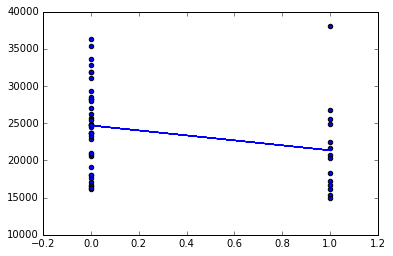

In [487]:
sex_linear.fit(sex[['Sex']], sex[['Salary']])
plt.scatter(sex[['Sex']], sex[['Salary']])
plt.plot(sex[['Sex']], sex_linear.predict(sex[['Sex']]))
sex_linear.score(sex[['Sex']], sex[['Salary']])

<h3>Salary and degree</h3>

0.0048616809847483742

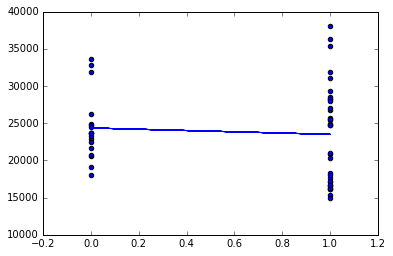

In [488]:
degree_linear.fit(degree[['Degree']], degree[['Salary']])
plt.scatter(degree[['Degree']], degree[['Salary']])
plt.plot(degree[['Degree']], degree_linear.predict(degree[['Degree']]))
degree_linear.score(degree[['Degree']], degree[['Salary']])

<h3>Salary and Years at Current Rank</h3>

0.49093702676921624

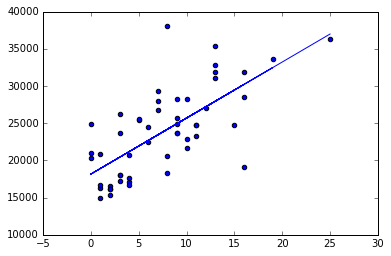

In [489]:
year_linear.fit(year[['Year']], year[['Salary']])
plt.scatter(year[['Year']], year[['Salary']])
plt.plot(year[['Year']], year_linear.predict(year[['Year']]))
year_linear.score(year[['Year']], year[['Salary']])

<h3>Salary and years since highest degree</h3>

0.45542813458360276

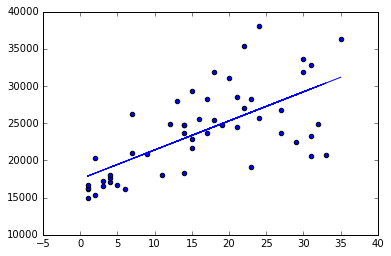

In [490]:

ysdeg_linear.fit(ysdeg[['YSdeg']], ysdeg[['Salary']])
plt.scatter(ysdeg[['YSdeg']], ysdeg[['Salary']])
plt.plot(ysdeg[['YSdeg']], ysdeg_linear.predict(ysdeg[['YSdeg']]))
ysdeg_linear.score(ysdeg[['YSdeg']], ysdeg[['Salary']])

<h3>Salary and years at current rank</h3>

0.49093702676921624

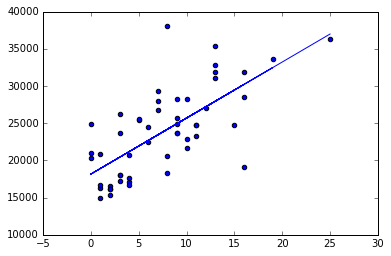

In [491]:
year_linear.fit(year[['Year']], year[['Salary']])
plt.scatter(year[['Year']], year[['Salary']])
plt.plot(year[['Year']], year_linear.predict(year[['Year']]))
year_linear.score(year[['Year']], year[['Salary']])